coco.names파일을 변경해주어야하고, 학습한 가중치를 darknet파일로 옮겨야 한다.

**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Dec  1 01:21:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 백준
 크롤링
'00. 추천시스템 이해 -Apriori, FP-Growth.ipynb'
'요세푸스 문제 0 (1).ipynb'
'요세푸스 문제 0.ipynb'
 1037.ipynb
 별찍기10.ipynb
 11047.ipynb
 1259.ipynb
'16173 점프왕 쩰리 (Small).ipynb'
'1. (공단 서식)개인정보 수집이용제공 동의서+서약서-김영일.hwp'
'스택 (1).ipynb'
'레퍼런스 분석 1.ipynb'
'알고리즘 수업 - 피보나치 수 1.ipynb'
'잃어버린 괄호 (1).ipynb'
'연암공대 과제 1차-무지성 변수 만들어서 적용하기..ipynb'
 1_빈도분석.ipynb
'1.김영일 - ML 실습 3.ipynb'
'김영일 서약서 1.pdf'
 2108.ipynb
 2일차3강_ANN실습.ipynb
'좌표 정렬하기 2.ipynb'
'스택 (2).ipynb'
'숫자 카드 2.ipynb의 사본'
'선형 모델2.ipynb'
 데이콘_여행_상품_신청_여부_예측_경진대회_2.ipynb
'레퍼런스 분석 2.ipynb'
'연암공대 2안.ipynb'
 카드2.ipynb
'다운로드 (2).jpeg'
'레퍼런스 3.ipynb'
 레퍼런스4.ipynb
 넘파이5.ipynb
 ACFrOgAWm0l9iz8HVwvAC4BpqdADGOzYl5qPKe7-zZhh6jMbcpJ02sRKAQ_aqlFfYIrWVTwD1GCRH_oSrxKx9O

**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


# 새 섹션

**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [ ]:
#!cp cfg/yolov3.cfg cfg/yolov3_training.cfg
!cp /mydrive/yolov3/data/yolov3_testing.cfg cfg/yolov3_training.cfg

In [ ]:

!echo -e '' > data/obj.names
!echo -e '' > data/obj.data
!cp /mydrive/yolov3/data/obj.names data/obj.names
!cp /mydrive/yolov3/data/obj.data data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-12-01 01:24:34--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  57.8MB/s    in 2.7s    

2022-12-01 01:24:37 (57.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
  inflating: data/obj/0.jpg          
  inflating: data/obj/0.txt          
  inflating: data/obj/1.jpg          
 extracting: data/obj/1.txt          
  inflating: data/obj/334.jpeg       
  inflating: data/obj/334.txt        
  inflating: data/obj/396be5ef-a086-4164-a46b-ad07542af935.jpeg  
 extracting: data/obj/396be5ef-a086-4164-a46b-ad07542af935.txt  
  inflating: data/obj/6.jpg          
  inflating: data/obj/6.txt          
  inflating: data/obj/88.jpeg        
 extracting: data/obj/88.txt         
  inflating: data/obj/a.jpg          
  inflating: data/obj/a.txt          
  inflating: data/obj/agz (38).jpg   
 extracting: data/obj/agz (38).txt   
  inflating: data/obj/e1d243d4-d41f-4e98-852a-187f0a969670.jpeg  
 extracting: data/obj/e1d243d4-d41f-4e98-852a-187f0a969670.txt  
  inflating: data/obj/image_1 (1).jpg  
  inflating: data/obj/image_1 (1).txt  
  inflating: data/obj/image_1.jpg    
 extracting: data/obj/image_1.txt    
  inflating: 

In [ ]:
import glob
images_list = glob.glob("/content/darknet/data/obj/*.jpg")
#images_list = glob.glob("data/obj/*.png")
print(images_list)

['/content/darknet/data/obj/image_23.jpg', '/content/darknet/data/obj/image_11 (1).jpg', '/content/darknet/data/obj/image_56.jpg', '/content/darknet/data/obj/agz (38).jpg', '/content/darknet/data/obj/maxresdefault.jpg', '/content/darknet/data/obj/image_10.jpg', '/content/darknet/data/obj/p.jpg', '/content/darknet/data/obj/image_12.jpg', '/content/darknet/data/obj/image_35.jpg', '/content/darknet/data/obj/image_15.jpg', '/content/darknet/data/obj/image_45.jpg', '/content/darknet/data/obj/thao-lee-v4zceVZ5HK8-unsplash.jpg', '/content/darknet/data/obj/a.jpg', '/content/darknet/data/obj/image_1.jpg', '/content/darknet/data/obj/image_1 (1).jpg', '/content/darknet/data/obj/image_2.jpg', '/content/darknet/data/obj/z.jpg', '/content/darknet/data/obj/phone1.jpg', '/content/darknet/data/obj/image_12 (1).jpg', '/content/darknet/data/obj/image_3.jpg', '/content/darknet/data/obj/image_6.jpg', '/content/darknet/data/obj/image_13.jpg', '/content/darknet/data/obj/6.jpg', '/content/darknet/data/obj/1.j

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_training
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 8, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shor

In [ ]:
!./darknet detect cfg/yolov3_training.cfg yolov3_training_last.weights data/obj/l.jpeg

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

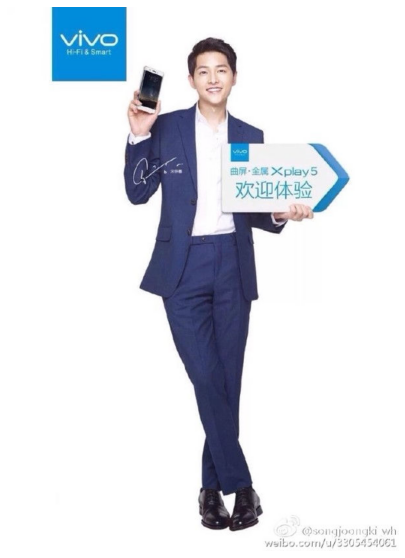

In [ ]:
# show image using our helper function
imShow('predictions.jpg')